In [1]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
from utils import * # tic toc imshow
%load_ext line_profiler

import higra as hg
hg.set_trace(False)
#hg.logger_register_print_callback()

Image size: (481, 321)


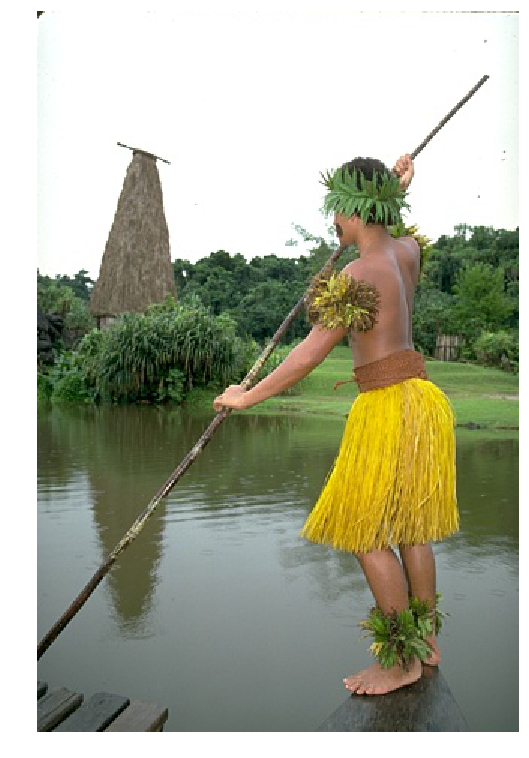

(<Figure size 481.5x721.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3f07fd6780>)

In [2]:
image = imageio.imread("data/101087.jpg")
# switch to float to avoir numerical issue with uint8
image = image.astype(np.float64)/255 
# discard the color channel
size = image.shape[:2]
print("Image size:", size)
imshow(image)

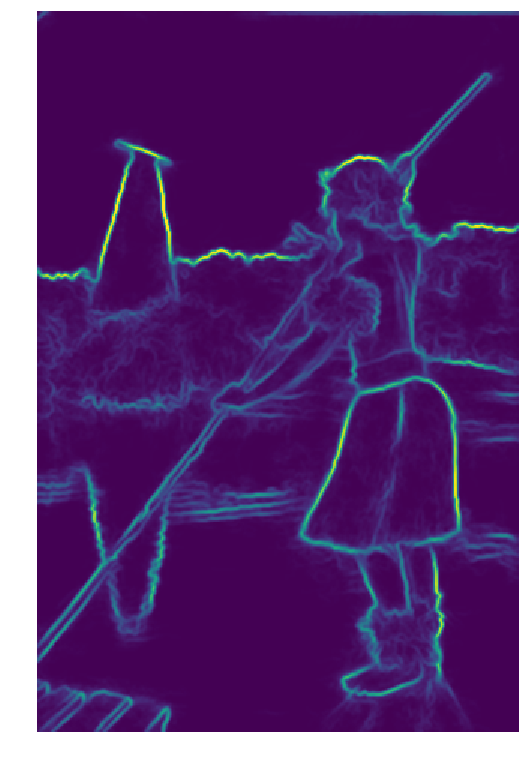

(<Figure size 481.5x721.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3f07ef7b38>)

In [3]:
sed_gradient = imageio.imread("data/101087_SED.png")
sed_gradient = sed_gradient.astype(np.float64)/255
imshow(sed_gradient)

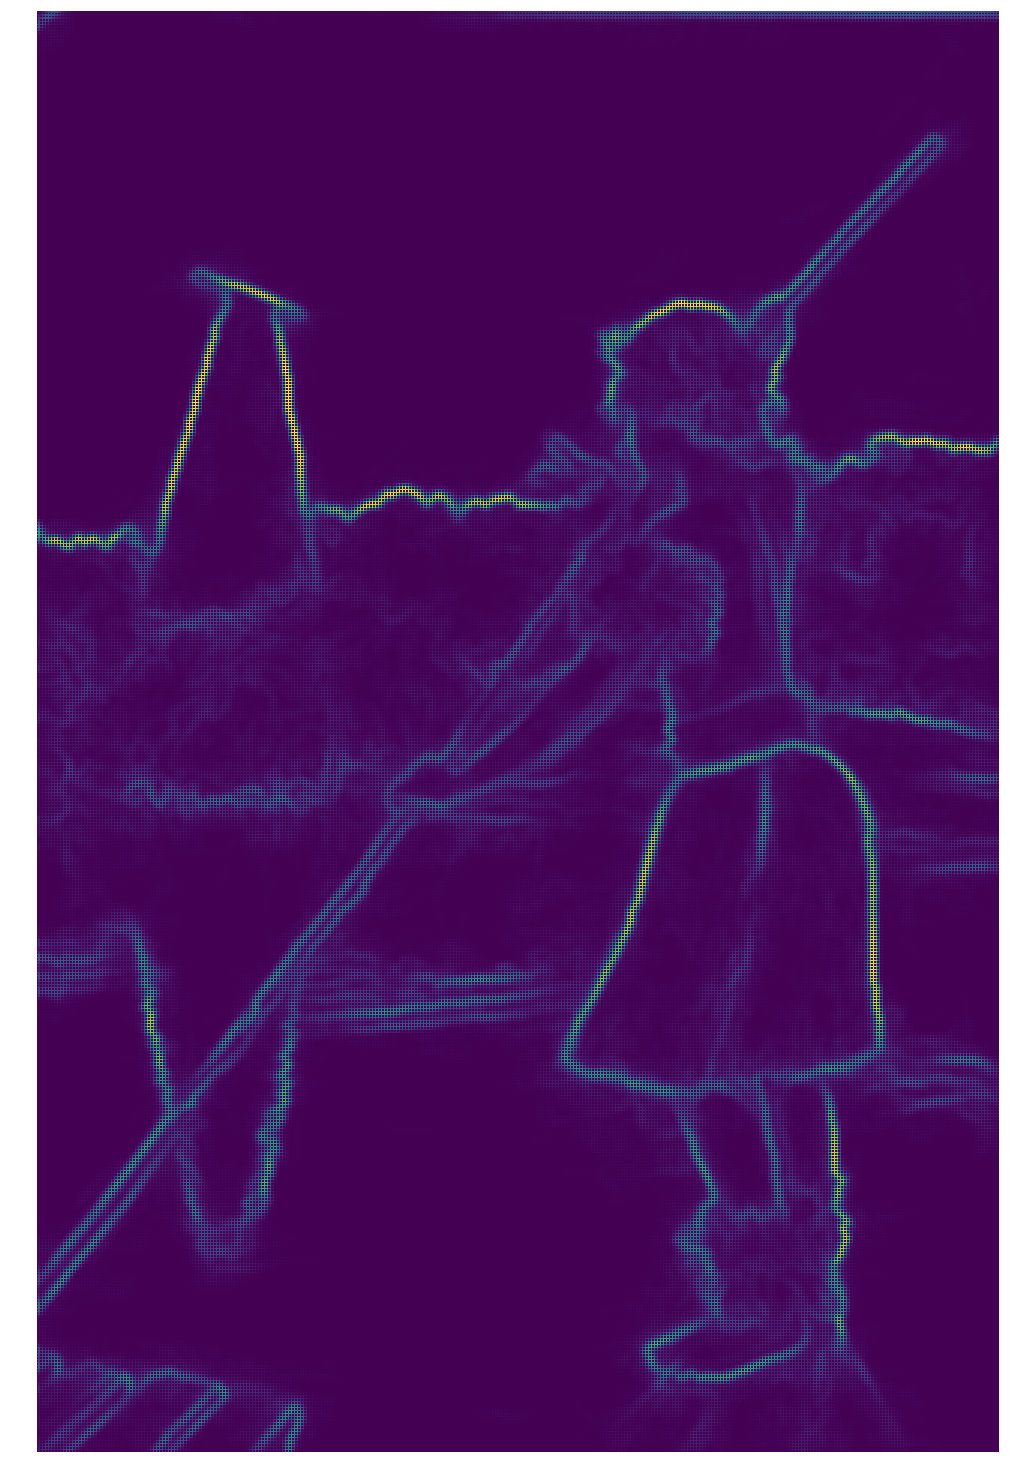

(<Figure size 961.5x1441.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3f07ebf6a0>)

In [4]:
graph = hg.get_4_adjacency_graph(size)
edge_weights = hg.weight_graph(sed_gradient, hg.WeightFunction.mean, graph)
sm = hg.graph_4_adjacency_2_khalimsky(edge_weights)
imshow(sm)


## WS Area on Pixels

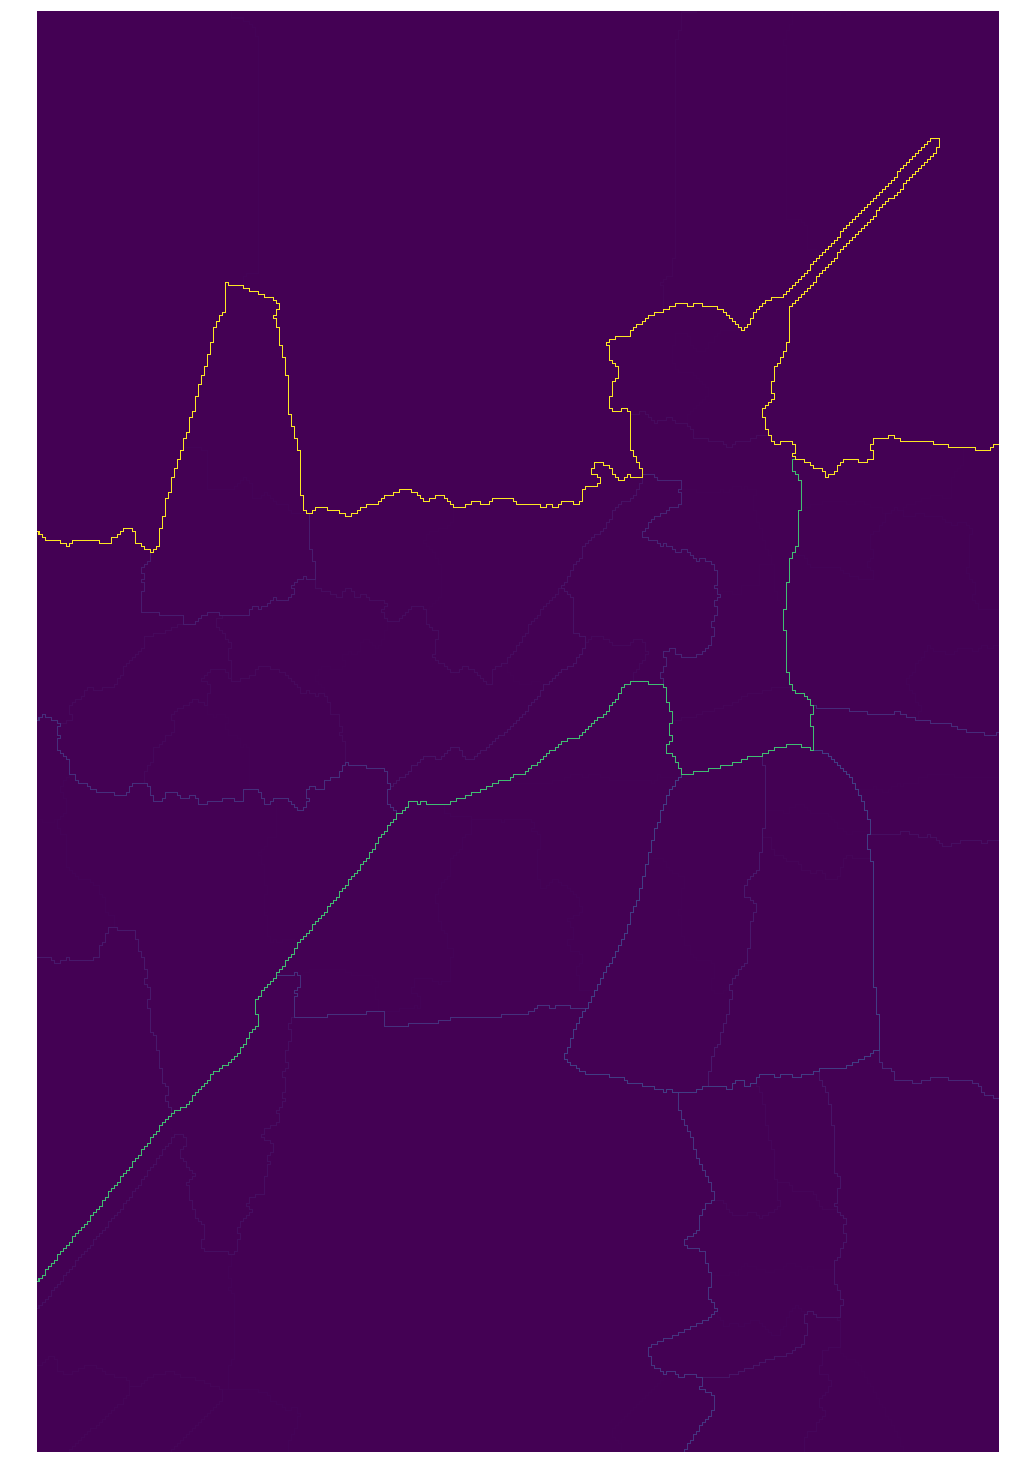

(<Figure size 961.5x1441.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3f07e9c5f8>)

In [5]:
tree_ws_area, altitudes_ws_area = hg.watershed_hierarchy_by_area(edge_weights)
sm = hg.saliency(altitudes_ws_area)
imshow(hg.graph_4_adjacency_2_khalimsky(sm))

In [6]:
%%timeit 
tree_ws_area, altitudes_ws_area = hg.watershed_hierarchy_by_area(edge_weights)
sm = hg.saliency(altitudes_ws_area)

148 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## WS Area with RAG

In [7]:
def ws_area_rag(edge_weights, graph):
    vertex_labels = hg.labelisation_watershed(edge_weights)
    rag = hg.make_region_adjacency_graph_from_labelisation(vertex_labels)
    rag_edge_weights = hg.rag_accumulate_on_edges(rag, hg.Accumulators.min, edge_weights)
    return hg.watershed_hierarchy_by_area(rag_edge_weights)

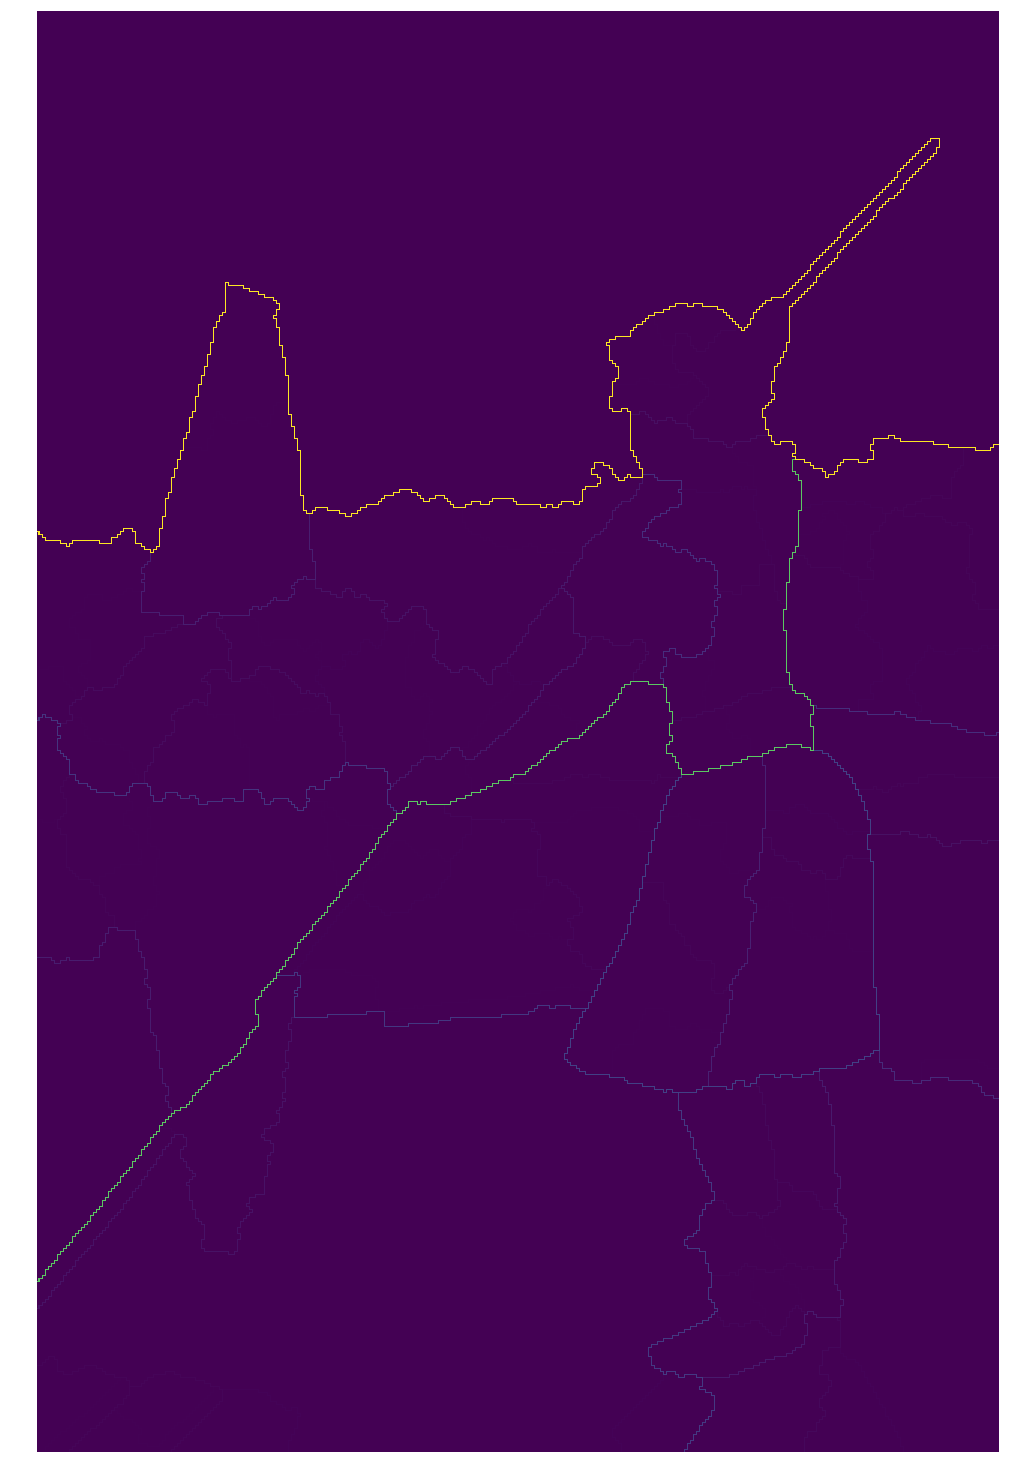

(<Figure size 961.5x1441.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3f07df67b8>)

In [8]:
tree_ws_area, altitudes_ws_area = ws_area_rag(edge_weights, graph)
sm = hg.saliency(altitudes_ws_area)
imshow(hg.graph_4_adjacency_2_khalimsky(sm))

In [9]:
%%timeit
tree_ws_area, altitudes_ws_area = ws_area_rag(edge_weights, graph)
sm = hg.saliency(altitudes_ws_area)

40.4 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
